# Date Night Movie

In this assignment we are going to use pandas to figure out - What's the best **date-night movie**?

This assignment is going to use
- Joining
- Groupby
- Sorting



In [109]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the movie data: `pd.read_table`

In [110]:
def get_movie_data():
    
    unames = ['user_id','gender','age','occupation','zip']
    users = pd.read_table(os.path.join('../data','users.dat',), 
                          sep='::', header=None, names=unames, encoding='latin1')
    
    rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
    ratings = pd.read_table(os.path.join('../data', 'ratings.dat'), 
                            sep='::', header=None, names=rnames, encoding='latin1').sort_values("timestamp")
    ratings["timestamp"] = pd.to_datetime(ratings["timestamp"], unit='s')

    
    mnames = ['movie_id', 'title','genres']
    movies = pd.read_table(os.path.join('../data', 'movies.dat'), 
                           sep='::', header=None, names=mnames, encoding='latin1')

    return users, ratings, movies

- In the above cell i have converted the timestamp to **datetime format** to better understand the dataset

In [3]:
users, ratings, movies = get_movie_data()

C:\Users\varsh\AppData\Local\Temp\ipykernel_16392\2990020759.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_table(os.path.join('../data','users.dat',),
C:\Users\varsh\AppData\Local\Temp\ipykernel_16392\2990020759.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_table(os.path.join('../data', 'ratings.dat'),
C:\Users\varsh\AppData\Local\Temp\ipykernel_16392\2990020759.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avo

In [111]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [112]:
users.shape

(6040, 5)

In [113]:
ratings.head()

,user_id,movie_id,rating,timestamp
1000138,6040,858,4,2000-04-25 23:05:32
1000153,6040,2384,4,2000-04-25 23:05:54
999873,6040,593,5,2000-04-25 23:05:54
1000007,6040,1961,4,2000-04-25 23:06:17
1000192,6040,2019,5,2000-04-25 23:06:17


In [114]:
ratings.shape

(1000209, 4)

In [115]:
movies.head()

,movie_id,title,genres,year,short_title
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Toy Story
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Jumanji
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,Grumpier Old Men
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,Waiting to Exhale
4,5,Father of the Bride Part II (1995),Comedy,1995,Father of the Bride Part II


In [116]:
movies.shape

(3883, 5)

##### Clean up the `movies`

- Get the `year`
- Shorten the `title`

In [117]:
tmp = movies.title.str.extract('(.*) \(([0-9]+)\)')
tmp.apply(lambda x:x[0] if len(x) > 0 else None)
tmp.apply(lambda x: x[0][:40] if len(x) > 0 else None)

0    Toy Story
1         1995
dtype: object

In [118]:
movies['year'] = tmp[1]
movies['short_title'] = tmp[0]

In [119]:
movies.head()

,movie_id,title,genres,year,short_title
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Toy Story
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Jumanji
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,Grumpier Old Men
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,Waiting to Exhale
4,5,Father of the Bride Part II (1995),Comedy,1995,Father of the Bride Part II


# Join the tables with `pd.merge` (20 pts)

#### merging users and ratings with user_id as common column
> ***users_ratings*** dataframe

In [120]:
users_ratings = pd.merge(users, ratings, on=['user_id'], how='inner')
users_ratings.head()

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp
0,1,F,1,10,48067,3186,4,2000-12-31 22:00:19
1,1,F,1,10,48067,1721,4,2000-12-31 22:00:55
2,1,F,1,10,48067,1270,5,2000-12-31 22:00:55
3,1,F,1,10,48067,1022,5,2000-12-31 22:00:55
4,1,F,1,10,48067,2340,3,2000-12-31 22:01:43


 size of the users_ratings dataframe

In [121]:
users_ratings.shape

(1000209, 8)

#### merging users_ratings and movies with movie_id as common column
> ***users_ratings_movies*** dataframe

In [122]:
users_ratings_movies = pd.merge(users_ratings, movies, on=['movie_id'], how='inner')
users_ratings_movies.head()

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres,year,short_title
0,1,F,1,10,48067,3186,4,2000-12-31 22:00:19,"Girl, Interrupted (1999)",Drama,1999,"Girl, Interrupted"
1,8,M,25,12,11413,3186,4,2000-12-31 02:47:32,"Girl, Interrupted (1999)",Drama,1999,"Girl, Interrupted"
2,33,M,45,3,55421,3186,3,2000-12-29 17:11:29,"Girl, Interrupted (1999)",Drama,1999,"Girl, Interrupted"
3,90,M,56,13,85749,3186,3,2001-06-30 04:30:17,"Girl, Interrupted (1999)",Drama,1999,"Girl, Interrupted"
4,99,F,1,10,19390,3186,3,2000-12-23 21:53:02,"Girl, Interrupted (1999)",Drama,1999,"Girl, Interrupted"


 size of the users_ratings_movies dataframe

In [123]:
users_ratings_movies.shape

(1000209, 12)

#### joining movies and ratings on movie_id and also setting index

- Im joining the movies and ratings dataframes and setting the index a movie_id to create dummies to seperate the genres column
> ***movies_ratings*** dataframe

In [124]:
movies_ratings = (ratings
                  .set_index("movie_id")
                  .join(movies.set_index("movie_id"),
                        how="left")
                 )
movies_ratings.head()

,user_id,rating,timestamp,title,genres,year,short_title
movie_id,,,,,,,
1,6035,4,2000-04-26 01:34:09,Toy Story (1995),Animation|Children's|Comedy,1995,Toy Story
1,6032,4,2000-04-26 03:02:07,Toy Story (1995),Animation|Children's|Comedy,1995,Toy Story
1,6022,5,2000-04-26 13:29:23,Toy Story (1995),Animation|Children's|Comedy,1995,Toy Story
1,6021,3,2000-04-26 13:52:27,Toy Story (1995),Animation|Children's|Comedy,1995,Toy Story
1,6016,4,2000-04-26 19:52:30,Toy Story (1995),Animation|Children's|Comedy,1995,Toy Story


 size of the movies_ratings dataframe

In [125]:
movies_ratings.shape

(1000209, 7)

#### Creating seperate columns for genres by using get_dummies as they are all in one column seperated by pipe delimiter
> ***genres_dummies*** dataframe

In [126]:
genres_dummies = movies_ratings['genres'].str.get_dummies()
genres_dummies.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Concatenate these dummies to the original movies_ratings data frame


In [130]:
full_movies_ratings = (pd.concat([movies_ratings, genres_dummies], axis=1)
                       .drop(["timestamp"], axis=1)
                )

full_movies_ratings.head()

,user_id,rating,title,genres,year,short_title,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,,,
1,6035,4,Toy Story (1995),Animation|Children's|Comedy,1995,Toy Story,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,6032,4,Toy Story (1995),Animation|Children's|Comedy,1995,Toy Story,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,6022,5,Toy Story (1995),Animation|Children's|Comedy,1995,Toy Story,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,6021,3,Toy Story (1995),Animation|Children's|Comedy,1995,Toy Story,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,6016,4,Toy Story (1995),Animation|Children's|Comedy,1995,Toy Story,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


#### Resetting the index
> ***full_movies_ratings*** dataframe

In [131]:
full_movies_ratings.reset_index(inplace=True)

full_movies_ratings.head()

,movie_id,user_id,rating,title,genres,year,short_title,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,6035,4,Toy Story (1995),Animation|Children's|Comedy,1995,Toy Story,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,6032,4,Toy Story (1995),Animation|Children's|Comedy,1995,Toy Story,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,6022,5,Toy Story (1995),Animation|Children's|Comedy,1995,Toy Story,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,6021,3,Toy Story (1995),Animation|Children's|Comedy,1995,Toy Story,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,6016,4,Toy Story (1995),Animation|Children's|Comedy,1995,Toy Story,0,0,1,...,0,0,0,0,0,0,0,0,0,0


size of the full_movies_ratings dataframe

In [129]:
full_movies_ratings.shape

(1000209, 25)

#### Merging users datafram with full_movies_ratings on user_id as common column
> ***full_users_ratings_movies*** dataframe

In [132]:
full_users_ratings_movies = pd.merge(users, full_movies_ratings, on=['user_id'], how='inner').drop(["occupation", "zip"],axis=1)
full_users_ratings_movies.head()

,user_id,gender,age,movie_id,rating,title,genres,year,short_title,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,F,1,1,5,Toy Story (1995),Animation|Children's|Comedy,1995,Toy Story,0,...,0,0,0,0,0,0,0,0,0,0
1,1,F,1,48,5,Pocahontas (1995),Animation|Children's|Musical|Romance,1995,Pocahontas,0,...,0,0,0,1,0,1,0,0,0,0
2,1,F,1,150,5,Apollo 13 (1995),Drama,1995,Apollo 13,0,...,0,0,0,0,0,0,0,0,0,0
3,1,F,1,260,4,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1977,Star Wars: Episode IV - A New Hope,1,...,1,0,0,0,0,0,1,0,0,0
4,1,F,1,527,5,Schindler's List (1993),Drama|War,1993,Schindler's List,0,...,0,0,0,0,0,0,0,0,1,0


size of the full_users_ratings_movies dataframe

In [52]:
full_users_ratings_movies.shape

(1000209, 28)

# What's the highest rated movie? (20 pts))

#### Getting number of users and movies from the dataset.

In [19]:
user_ids = ratings.user_id.unique().tolist()
movie_ids = ratings.movie_id.unique().tolist()
print('Number of Users: {}'.format(len(user_ids)))
print('Number of Movies: {}'.format(len(movie_ids)))

Number of Users: 6040
Number of Movies: 3706


### Groupby movie_id
> ***movie_id_group*** dataframe 
- Groupby 'movie_id' and 'short_title' to get the count and mean of the ratings , to find the highest rated movie 

In [133]:
movie_id_group = users_ratings_movies.groupby(['movie_id','short_title'])['rating'].agg(['count','mean'])
movie_id_group 

,,count,mean
movie_id,short_title,,
1,Toy Story,2077,4.146846
2,Jumanji,701,3.201141
3,Grumpier Old Men,478,3.016736
4,Waiting to Exhale,170,2.729412
5,Father of the Bride Part II,296,3.006757
...,...,...,...
3948,Meet the Parents,862,3.635731
3949,Requiem for a Dream,304,4.115132
3950,Tigerland,54,3.666667


### Sorting to get the highest rated movie

#### Sorting by mean first and count for the movie ratings 

- sorting it to the descending order 
- Which gives an output of the highest mean of the movie ratings ,but which is only rated by very few users 
- And is **not statistically significant.**
- So sorting by count and then mean gives the highest rated movies also considering the count of the movie ratings

In [21]:
movie_id_group.sort_values(by=['mean','count'], ascending=False)

,,count,mean
movie_id,short_title,,
787,"Gate of Heavenly Peace, The",3,5.0
3233,Smashing Time,2,5.0
989,Schlafes Bruder (Brother of Sleep),1,5.0
1830,Follow the Bitch,1,5.0
3172,Ulysses (Ulisse),1,5.0
...,...,...,...
3237,Kestrel's Eye (Falkens öga),1,1.0
3312,"McCullochs, The",1,1.0
3376,"Fantastic Night, The (La Nuit Fantastique)",1,1.0


> Method 1

#### Sorting by counts and mean for the movie ratings
- This gives an output of highest number of counts and its mean

In [22]:
movie_id_group.sort_values(by=['count','mean'], ascending=False)

,,count,mean
movie_id,short_title,,
2858,American Beauty,3428,4.317386
260,Star Wars: Episode IV - A New Hope,2991,4.453694
1196,Star Wars: Episode V - The Empire Strikes Back,2990,4.292977
1210,Star Wars: Episode VI - Return of the Jedi,2883,4.022893
480,Jurassic Park,2672,3.763847
...,...,...,...
3237,Kestrel's Eye (Falkens öga),1,1.000000
3312,"McCullochs, The",1,1.000000
3376,"Fantastic Night, The (La Nuit Fantastique)",1,1.000000


> Method 2

In [23]:
movie_id_group.nlargest(5, 'count')

,,count,mean
movie_id,short_title,,
2858,American Beauty,3428,4.317386
260,Star Wars: Episode IV - A New Hope,2991,4.453694
1196,Star Wars: Episode V - The Empire Strikes Back,2990,4.292977
1210,Star Wars: Episode VI - Return of the Jedi,2883,4.022893
480,Jurassic Park,2672,3.763847


- movie_id and its rating counts

> Method 3

In [24]:
count_group = users_ratings_movies.groupby("movie_id").count()["rating"]
count_group

movie_id
1       2077
2        701
3        478
4        170
5        296
        ... 
3948     862
3949     304
3950      54
3951      40
3952     388
Name: rating, Length: 3706, dtype: int64

- if we put a threshold for movies having rating count greater than 2500, we get the top 13  with  rating counts higher than 2500
- if we put a threshold for movies having rating count greater than 3000, we get the only movie_id which as the rating count more than 3000 which is 2858.
- by refering to the movie_id_group table , the movie_id number 2858 belongs to 
### American Beauty which has the movie rating at 4.317 with  a highest rating count of 2858 is the Highest rated movie

In [25]:
high_movie_list = count_group[count_group > 2500].index.values
high_movie_list

array([ 260,  480,  589,  593,  608, 1196, 1198, 1210, 1270, 1580, 2028,
       2571, 2858], dtype=int64)

In [135]:
highest_movie = count_group[count_group > 3000].index.values
highest_movie

array([2858], dtype=int64)

> Method 4

### threshold is movies rating counts more than 2500 
- Sort the ratings counts in descending order

In [27]:
highest_rated = movie_id_group[movie_id_group['count'] > 2500] 
highest_rated .sort_values(by=['count'], ascending=False)

,,count,mean
movie_id,short_title,,
2858,American Beauty,3428,4.317386
260,Star Wars: Episode IV - A New Hope,2991,4.453694
1196,Star Wars: Episode V - The Empire Strikes Back,2990,4.292977
1210,Star Wars: Episode VI - Return of the Jedi,2883,4.022893
480,Jurassic Park,2672,3.763847
2028,Saving Private Ryan,2653,4.337354
589,Terminator 2: Judgment Day,2649,4.058513
2571,"Matrix, The",2590,4.315830
1270,Back to the Future,2583,3.990321


### The Highest Rated Movie would be 
> The movie that has the highest rating count and the highest mean rating
### American Beauty is the highest rated movie with 3428 ratings count and 4.317 rating mean 

# What is a good rated movie for date night? (60 pts)

- Hint - highly rated movie by 
    - both partners (might be the same gender or not),
    - based on genre preferences,
    - age group can also be combined

## Groupby Gender

In [45]:
by_gender = full_users_ratings_movies.groupby(['gender'])
by_gender

for gender, gender_df in by_gender:
    print (gender)
    print (gender_df)

#### Get FEMALE gender

In [44]:
female_gender = by_gender.get_group('F')
female_gender.head(5)

,user_id,gender,age,movie_id,rating,title,genres,year,short_title,Action,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,age_bins
0,1,F,1,1,5,Toy Story (1995),Animation|Children's|Comedy,1995,Toy Story,0,...,0,0,0,0,0,0,0,0,0,young
1,1,F,1,48,5,Pocahontas (1995),Animation|Children's|Musical|Romance,1995,Pocahontas,0,...,0,0,1,0,1,0,0,0,0,young
2,1,F,1,150,5,Apollo 13 (1995),Drama,1995,Apollo 13,0,...,0,0,0,0,0,0,0,0,0,young
3,1,F,1,260,4,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1977,Star Wars: Episode IV - A New Hope,1,...,0,0,0,0,0,1,0,0,0,young
4,1,F,1,527,5,Schindler's List (1993),Drama|War,1993,Schindler's List,0,...,0,0,0,0,0,0,0,1,0,young


In [37]:
female_gender.shape

(246440, 27)

In [30]:
female_group = female_gender.groupby(['movie_id','short_title','genres'])['rating'].agg(['count','mean'])
female_group.sort_values(by=['count','mean'], ascending=False).head(5)

,,,count,mean
movie_id,short_title,genres,,
2858,American Beauty,Comedy|Drama,946,4.238901
2396,Shakespeare in Love,Comedy|Romance,798,4.181704
593,"Silence of the Lambs, The",Drama|Thriller,706,4.271955
2762,"Sixth Sense, The",Thriller,664,4.477410
1265,Groundhog Day,Comedy|Romance,658,3.735562


#### Top  genres with highest no. of movies ratings by female

In [31]:
top6_genre_female = (female_gender.iloc[:, 10:-1].sum().sort_values(ascending=False).head(5)
              .index.values
              )

top6_genre_female

array(['Drama', 'Comedy', 'Romance', 'Thriller', 'Sci-Fi'], dtype=object)

- **My choice of genre would be Drama**


#### Get MALE gender

In [38]:
male_gender = by_gender.get_group('M')
male_gender.head(5)

,user_id,gender,age,movie_id,rating,title,genres,year,short_title,Action,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,age_bins
53,2,M,56,21,1,Get Shorty (1995),Action|Comedy|Drama,1995,Get Shorty,1,...,0,0,0,0,0,0,0,0,0,old
54,2,M,56,95,2,Broken Arrow (1996),Action|Thriller,1996,Broken Arrow,1,...,0,0,0,0,0,0,1,0,0,old
55,2,M,56,110,5,Braveheart (1995),Action|Drama|War,1995,Braveheart,1,...,0,0,0,0,0,0,0,1,0,old
56,2,M,56,163,4,Desperado (1995),Action|Romance|Thriller,1995,Desperado,1,...,0,0,0,0,1,0,1,0,0,old
57,2,M,56,165,3,Die Hard: With a Vengeance (1995),Action|Thriller,1995,Die Hard: With a Vengeance,1,...,0,0,0,0,0,0,1,0,0,old


In [41]:
male_gender.shape

(753769, 27)

In [33]:
male_group = male_gender.groupby(['movie_id','short_title','genres'])['rating'].agg(['count','mean'])
male_group.sort_values(by=['count','mean'], ascending=False).head(5)

,,,count,mean
movie_id,short_title,genres,,
2858,American Beauty,Comedy|Drama,2482,4.347301
260,Star Wars: Episode IV - A New Hope,Action|Adventure|Fantasy|Sci-Fi,2344,4.495307
1196,Star Wars: Episode V - The Empire Strikes Back,Action|Adventure|Drama|Sci-Fi|War,2342,4.344577
1210,Star Wars: Episode VI - Return of the Jedi,Action|Adventure|Romance|Sci-Fi|War,2230,4.069058
589,Terminator 2: Judgment Day,Action|Sci-Fi|Thriller,2193,4.115367


#### Top 5 genres with highest no. of movies ratings by male

In [35]:
top6_genre_male = (male_gender.iloc[:, 10:-1].sum().sort_values(ascending=False).head(5)
              .index.values
              )

top6_genre_male

array(['Comedy', 'Drama', 'Thriller', 'Sci-Fi', 'Adventure'], dtype=object)

- **My date's choice of genre is Thriller**

# Groupby Age_group and Cut to 3 bins 
- young

- middle_age

- old

In [60]:
full_users_ratings_movies['age_bins'] = pd.cut(full_users_ratings_movies ['age'],bins=3, labels=('young','middle_age','old'))
age_group = full_users_ratings_movies.groupby(['age_bins'])['movie_id'].agg(['count'])
age_group


,count
age_bins,
young,210747
middle_age,594559
old,194903


In [73]:
full_users_ratings_movies

,user_id,gender,age,index,movie_id,rating,title,genres,year,short_title,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,age_bins
0,1,F,1,1975,1,5,Toy Story (1995),Animation|Children's|Comedy,1995,Toy Story,...,0,0,0,0,0,0,0,0,0,young
1,1,F,1,23240,48,5,Pocahontas (1995),Animation|Children's|Musical|Romance,1995,Pocahontas,...,0,0,1,0,1,0,0,0,0,young
2,1,F,1,42653,150,5,Apollo 13 (1995),Drama,1995,Apollo 13,...,0,0,0,0,0,0,0,0,0,young
3,1,F,1,70280,260,4,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1977,Star Wars: Episode IV - A New Hope,...,0,0,0,0,0,1,0,0,0,young
4,1,F,1,143853,527,5,Schindler's List (1993),Drama|War,1993,Schindler's List,...,0,0,0,0,0,0,0,1,0,young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,6040,M,25,951295,3683,4,Blood Simple (1984),Drama|Film-Noir,1984,Blood Simple,...,1,0,0,0,0,0,0,0,0,middle_age
1000205,6040,M,25,958523,3703,4,Mad Max 2 (a.k.a. The Road Warrior) (1981),Action|Sci-Fi,1981,Mad Max 2 (a.k.a. The Road Warrior),...,0,0,0,0,0,1,0,0,0,middle_age
1000206,6040,M,25,965348,3735,4,Serpico (1973),Crime|Drama,1973,Serpico,...,0,0,0,0,0,0,0,0,0,middle_age
1000207,6040,M,25,968506,3751,4,Chicken Run (2000),Animation|Children's|Comedy,2000,Chicken Run,...,0,0,0,0,0,0,0,0,0,middle_age


In [58]:
young_group = users_ratings_movies.groupby(['age'])['age_bins'].agg(['count'])
young_group


count
movie_id age       
1        1      112
         18     448
         25     790
         35     423
         45     143
...             ...
3952     25     146
         35      71
         45      30
         50      46
         56      24

[22457 rows x 1 columns]

## Movie production year

In [67]:
year_count = (full_users_ratings_movies[["year", "movie_id"]]
             .groupby("year")
             .count()
            )

year_count.tail()

,movie_id
year,
1996,59382
1997,65402
1998,68226
1999,86833
2000,41000


<AxesSubplot: title={'center': 'Count of Rated Movies - by production year'}, xlabel='year'>

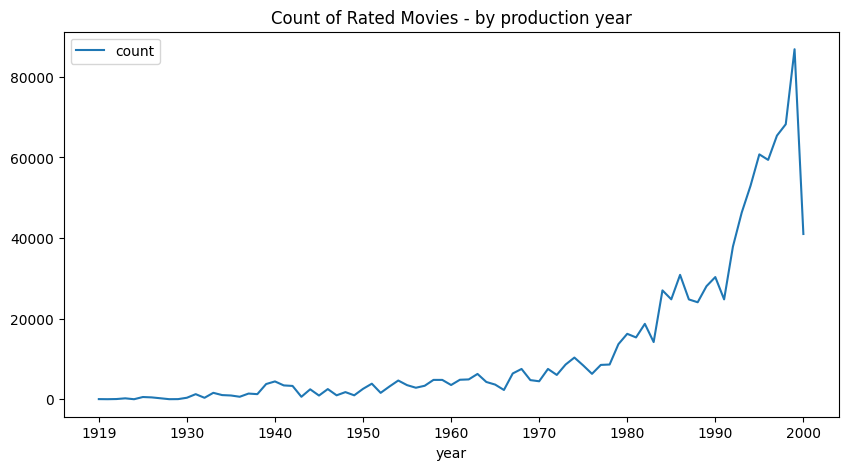

In [71]:
(year_count
 .rolling(1).mean().rename(columns={"movie_id":"count"})
 .plot(figsize=(10,5),
       title="Count of Rated Movies - by production year")
)

##### Considering 2 critical year frames
> Considering the production years from 1935 to 1940 , When the movie productions first incressed rapidly
- 1939 is also called as the Golden year of hollyhood

> Considering the production years from 1990 to 2000 , When the movie productions incressed rapidly



# Movie genres 

### Top 6 genres with highest no. of movies

In [63]:
top6_genre = (full_users_ratings_movies.iloc[:, 11:-2].sum().sort_values(ascending=False).head(6)
              .index.values
              )

top6_genre

array(['Comedy', 'Drama', 'Thriller', 'Sci-Fi', 'Romance', 'Adventure'],
      dtype=object)

In [89]:
genre_groups = (full_users_ratings_movies.iloc[:, 8:]
                .groupby("year")
                .sum()
               ).loc["1935":"1940", top6_genre]

In [90]:
genre_groups

,Comedy,Drama,Thriller,Sci-Fi,Romance,Adventure
year,,,,,,
1935,251,0,253,0,251,225
1936,493,24,73,0,0,0
1937,200,446,10,0,198,0
1938,689,210,199,0,215,378
1939,216,3386,0,0,1288,1835
1940,1745,599,479,12,1203,105


<AxesSubplot: title={'center': 'Total Rated Films'}, xlabel='year'>

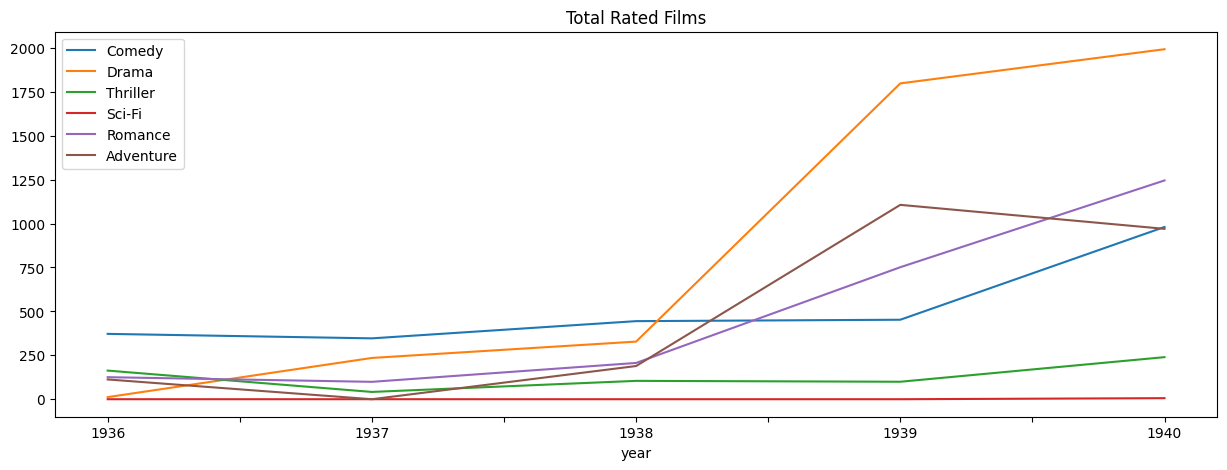

In [91]:
genre_groups.rolling(2).mean().plot(figsize=(15,5),
                                    title="Total Rated Films")

In [102]:
genre_groups= (full_users_ratings_movies.iloc[:, 8:]
                .groupby("year")
                .sum()
               ).loc["1990":"2000", top6_genre]

In [79]:
genre_groups

,Comedy,Drama,Thriller,Sci-Fi,Romance,Adventure
year,,,,,,
1990,8382,9692,10756,5729,4972,4240
1991,6896,11132,6811,4982,3699,2542
1992,15437,13285,7165,4191,7418,1771
1993,17462,16636,7265,5799,8712,5997
1994,23172,19803,8382,3374,13929,5504
1995,21244,26390,13493,7135,12272,7594
1996,20142,22188,15632,7517,11264,9361
1997,21452,25287,20551,12696,9275,9264
1998,24911,23730,17871,8370,13287,5204


<AxesSubplot: title={'center': 'Total Rated Films'}, xlabel='year'>

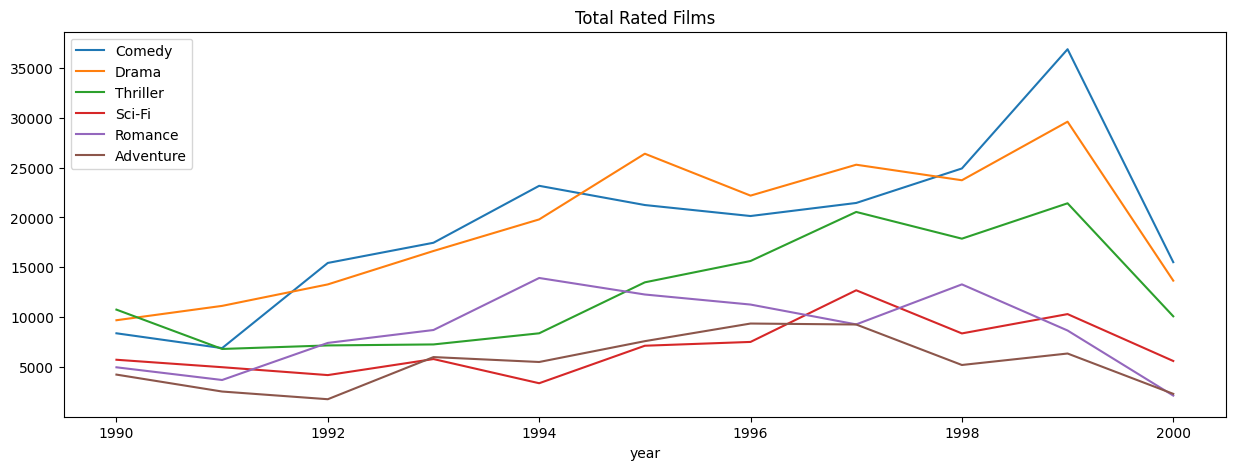

In [80]:
genre_groups_2.rolling(1).mean().plot(figsize=(15,5),
                                    title="Total Rated Films")

#### Choosing Drama as my genre choice and Thriller as my date's choice of genre 
- From the above 2 production year ranges ,I considertion the year range 1990 to 2000 as the number of movies produced is more both in Drama and Thriller genres

##### Refering the genre_groups table 
- Drama has 29602 movies in 1999
- Thriller also has 21419 in 1999 
- which are highest for both in that year range 
- so choosing a movie from 1999 for the date night

## Movie genres preferance

## Cosidering Drama as my genre choice and Thriller as my date's choice of genre

### Groupby genre

In [84]:
by_genres = full_users_ratings_movies.groupby(['genres'])
by_genres

In [87]:
Drama_Thriller_genres = by_genres.get_group('Drama|Thriller')
Drama_Thriller_genres.head(5)

,user_id,gender,age,index,movie_id,rating,title,genres,year,short_title,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,age_bins
75,2,M,56,167774,593,5,"Silence of the Lambs, The (1991)",Drama|Thriller,1991,"Silence of the Lambs, The",...,0,0,0,0,0,0,1,0,0,old
122,2,M,56,499986,1834,4,"Spanish Prisoner, The (1997)",Drama|Thriller,1997,"Spanish Prisoner, The",...,0,0,0,0,0,0,1,0,0,old
166,2,M,56,841963,3147,5,"Green Mile, The (1999)",Drama|Thriller,1999,"Green Mile, The",...,0,0,0,0,0,0,1,0,0,old
187,3,M,25,167773,593,3,"Silence of the Lambs, The (1991)",Drama|Thriller,1991,"Silence of the Lambs, The",...,0,0,0,0,0,0,1,0,0,middle_age
255,5,M,25,8389,16,3,Casino (1995),Drama|Thriller,1995,Casino,...,0,0,0,0,0,0,1,0,0,middle_age


In [103]:
Drama_Thriller_group = Drama_Thriller_genres.groupby(['movie_id','short_title','year'])['rating'].agg(['count','mean'])
Drama_Thriller_group 

,,,count,mean
movie_id,short_title,year,,
16,Casino,1995,682,3.793255
61,Eye for an Eye,1996,67,3.000000
79,"Juror, The",1996,114,2.605263
92,Mary Reilly,1996,88,2.340909
100,City Hall,1996,128,3.062500
...,...,...,...,...
3731,Cutter's Way,1981,43,3.395349
3810,White Sands,1992,83,3.132530
3848,Silent Fall,1994,20,3.100000


In [104]:
by_year = Drama_Thriller_group.groupby(['year'])
by_year

In [105]:
year_group = by_year.get_group('1999')
year_group.head(5)

,,,count,mean
movie_id,short_title,year,,
2479,Gloria,1999,44,2.272727
2676,Instinct,1999,266,3.135338
2688,"General's Daughter, The",1999,691,3.141823
3147,"Green Mile, The",1999,1222,4.154664


In [106]:
year_group.sort_values(by=['count','mean'], ascending=False)

,,,count,mean
movie_id,short_title,year,,
3147,"Green Mile, The",1999,1222,4.154664
2688,"General's Daughter, The",1999,691,3.141823
2676,Instinct,1999,266,3.135338
2479,Gloria,1999,44,2.272727


# As " The Green Mile " is the highest  rated Drama|Thriller movie 
- rated by around 1222 people 
- and has a average rating of 4.154
> **"The Green Mile"** would be a good choice to watch on a date night